In [3]:
%load_ext watermark
%watermark -a Filippo_Valle -p pandas,numpy,trisbm -r -b -iv -v -m


(ipykernel_launcher.py:171493): dbind-WARNING **: 15:37:18.894: Couldn't connect to accessibility bus: Failed to connect to socket /run/user/1000/at-spi/bus_1: No such file or directory


Author: Filippo_Valle

Python implementation: CPython
Python version       : 3.12.0
IPython version      : 8.17.2

pandas: 2.1.3
numpy : 1.26.0
trisbm: 0.5.1

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 6.5.0-13-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git repo: git@github.com:fvalle1/trisbm

Git branch: main



In [4]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
sys.path.append("../trisbm/")
from nsbm import nsbm

In [5]:
df = pd.DataFrame(
index = ["w{}".format(w) for w in range(10)],
columns = ["doc{}".format(d) for d in range(25)],
data = np.random.randint(1, 10, 250).reshape((10, 25)))

df_key_list = []

## keywords
df_key_list.append(
    pd.DataFrame(
    index = ["keyword{}".format(w) for w in range(10)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 10, (10, 25)))
)
    
## authors
df_key_list.append(
    pd.DataFrame(
    index = ["author{}".format(w) for w in range(10)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 5, (10, 25)))
)
    
## other features
df_key_list.append(
    pd.DataFrame(
    index = ["feature{}".format(w) for w in range(25)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 5, (25, 25)))
)

In [6]:
df.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc15,doc16,doc17,doc18,doc19,doc20,doc21,doc22,doc23,doc24
w0,2,7,7,6,9,4,2,3,6,2,...,1,7,1,3,2,2,2,4,9,4
w1,9,1,8,8,1,8,2,2,7,1,...,1,1,1,8,1,6,9,2,3,2
w2,3,1,8,1,2,1,9,6,4,6,...,3,2,4,8,3,9,1,8,4,9
w3,6,7,1,9,8,7,2,6,2,6,...,7,9,8,4,7,6,3,6,8,4
w4,1,1,9,2,4,9,4,6,8,6,...,8,5,7,9,3,4,3,1,7,4


In [7]:
df_key_list[0].head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc15,doc16,doc17,doc18,doc19,doc20,doc21,doc22,doc23,doc24
keyword0,2,3,8,2,9,1,8,1,2,7,...,9,5,9,8,7,8,6,8,8,3
keyword1,8,3,5,5,7,3,7,7,9,4,...,5,8,7,1,7,9,1,1,7,9
keyword2,9,2,5,9,1,5,3,6,1,6,...,3,2,6,2,2,5,8,8,5,1
keyword3,6,1,2,3,9,8,9,4,1,3,...,9,5,8,3,7,2,2,4,4,6
keyword4,8,6,4,1,9,2,8,4,7,5,...,8,1,4,2,8,8,4,1,9,6


In [8]:
model = nsbm()

In [9]:
model.make_graph_multiple_df(df, df_key_list)

In [10]:
model.g.vp["kind"].a

PropertyArray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
               2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
              dtype=int32)

In [11]:
model.nbranches

3

In [12]:
model.fit(n_init=1, B_min=50, verbose=False)

In [13]:
model._get_shape()

(25, 10, [10, 10, 25])

In [14]:
model.g

<Graph object, undirected, with 80 vertices and 1375 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f4c02b779b0>

In [15]:
model.metadata(0,-1,3)

{0: [('##author3', 1.0)],
 1: [('##author6', 0.34782608695652173),
  ('##author4', 0.33695652173913043),
  ('##author7', 0.31521739130434784)],
 2: [('##author1', 0.36),
  ('##author0', 0.32571428571428573),
  ('##author2', 0.3142857142857143)],
 3: [('##author9', 0.3641025641025641),
  ('##author8', 0.3384615384615385),
  ('##author5', 0.29743589743589743)]}

Saving level 5
Saving level 4
Saving level 3
Saving level 2
Saving level 1
Saving level 0


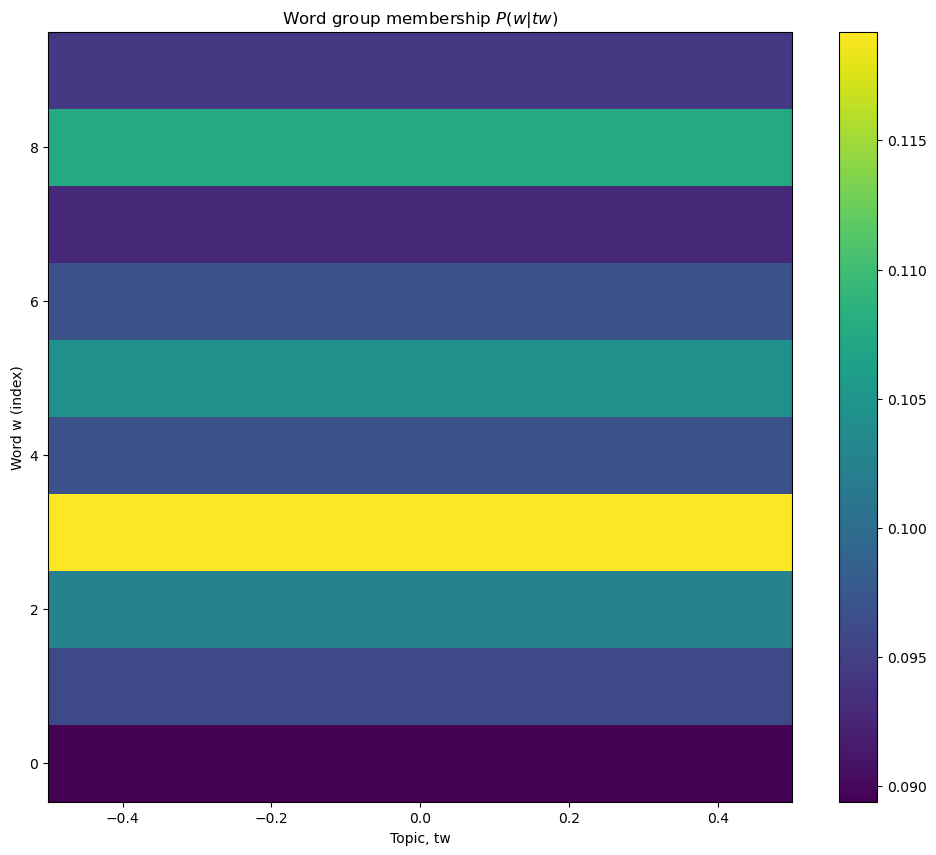

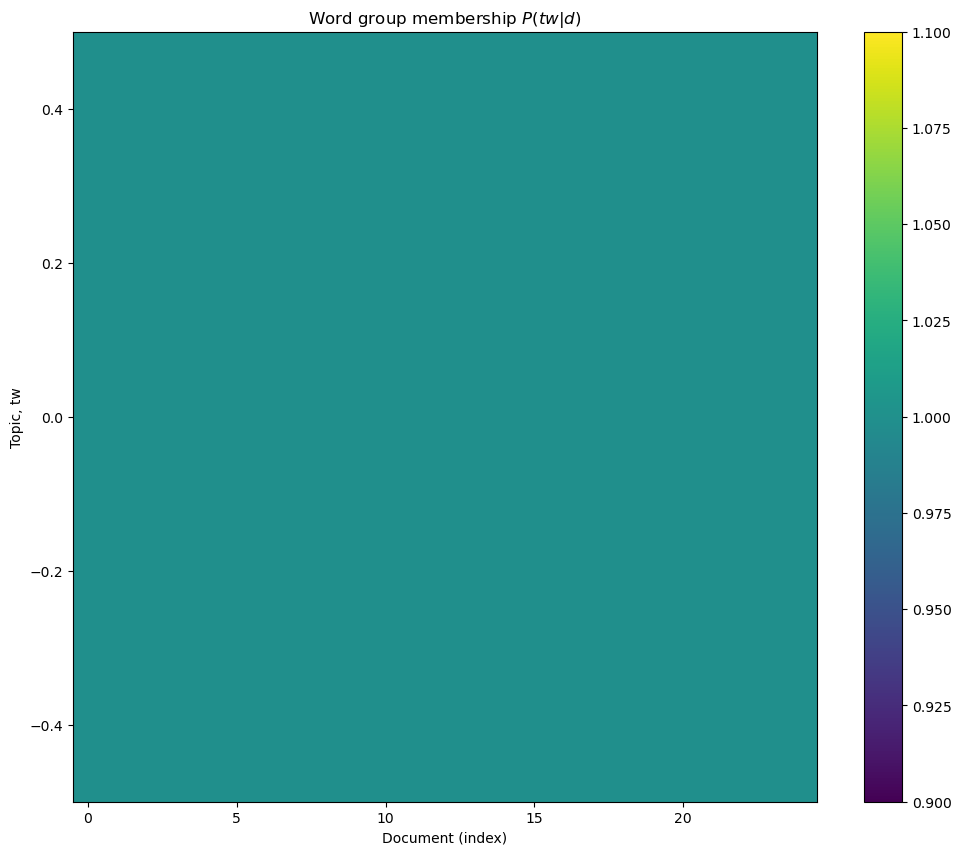

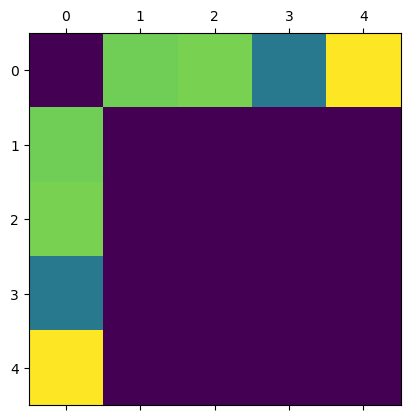

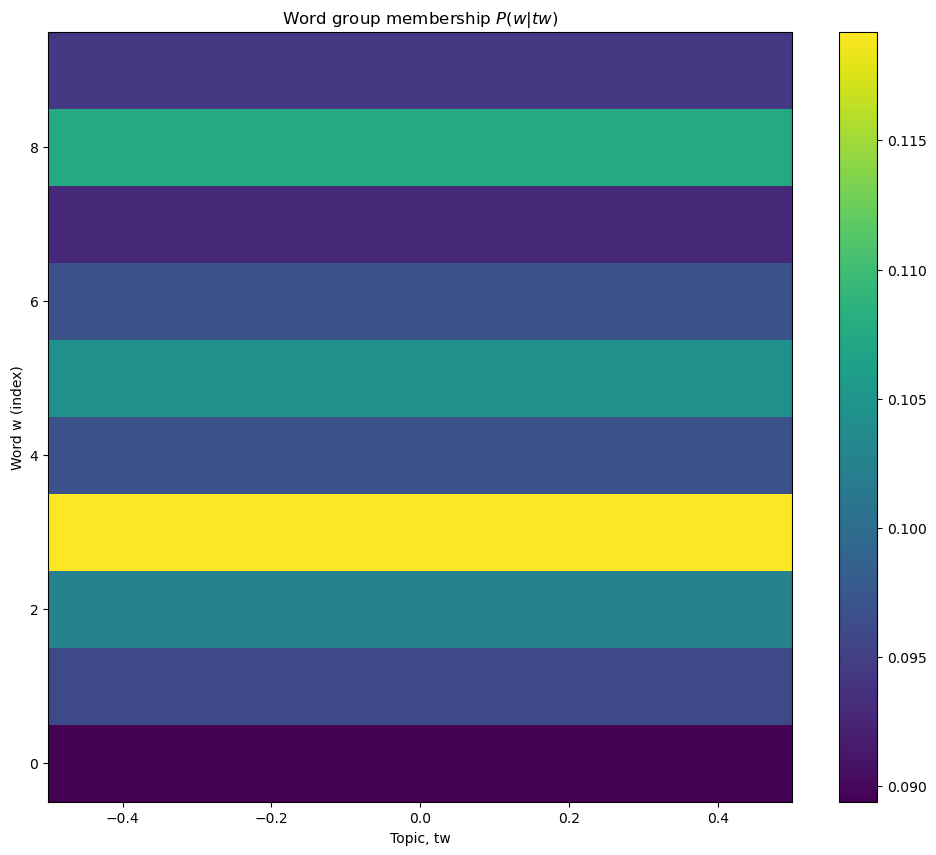

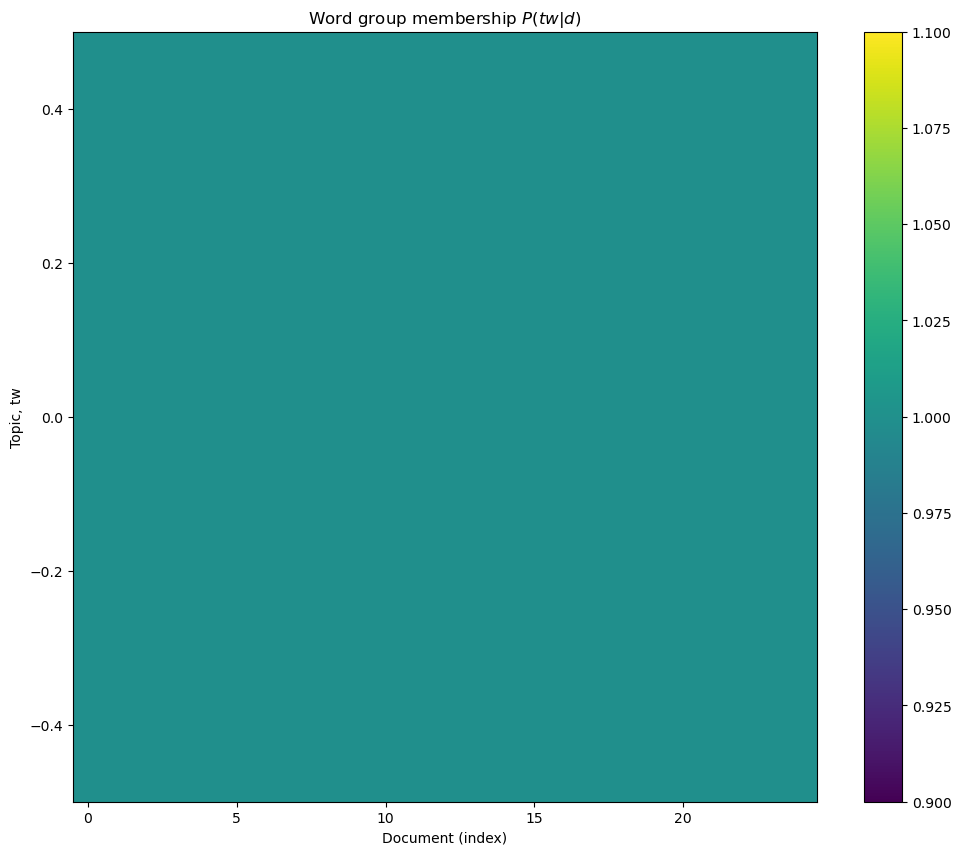

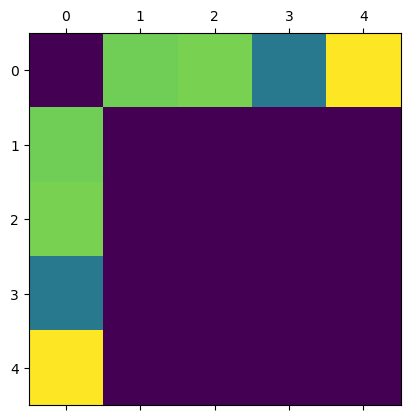

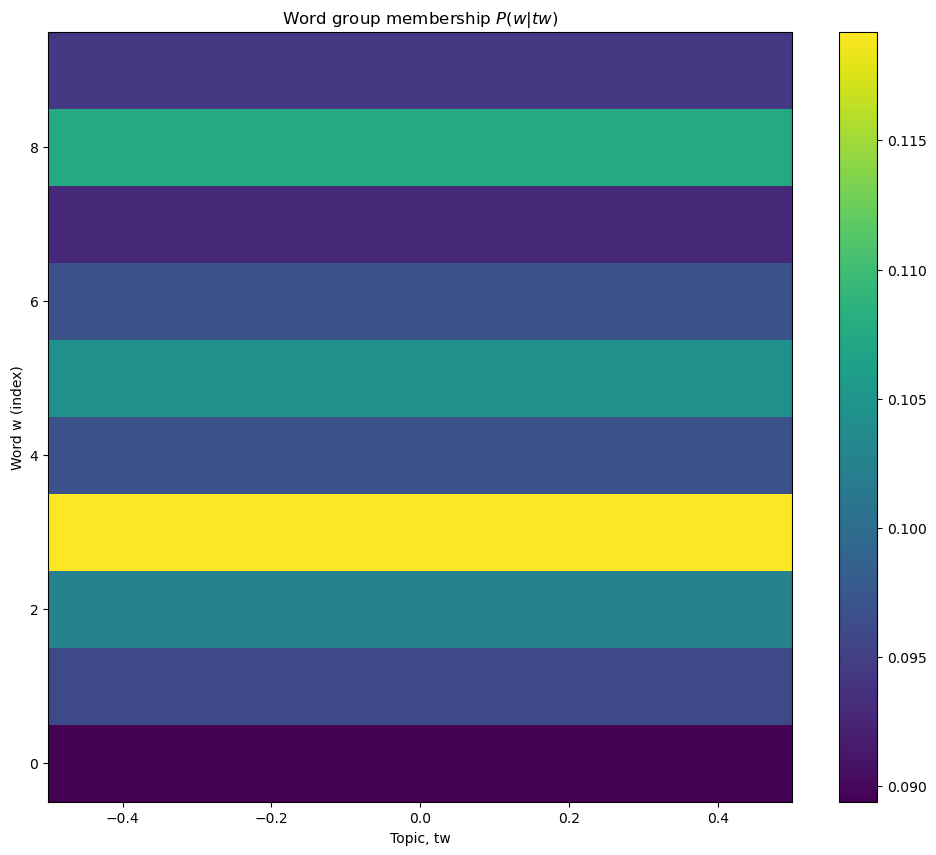

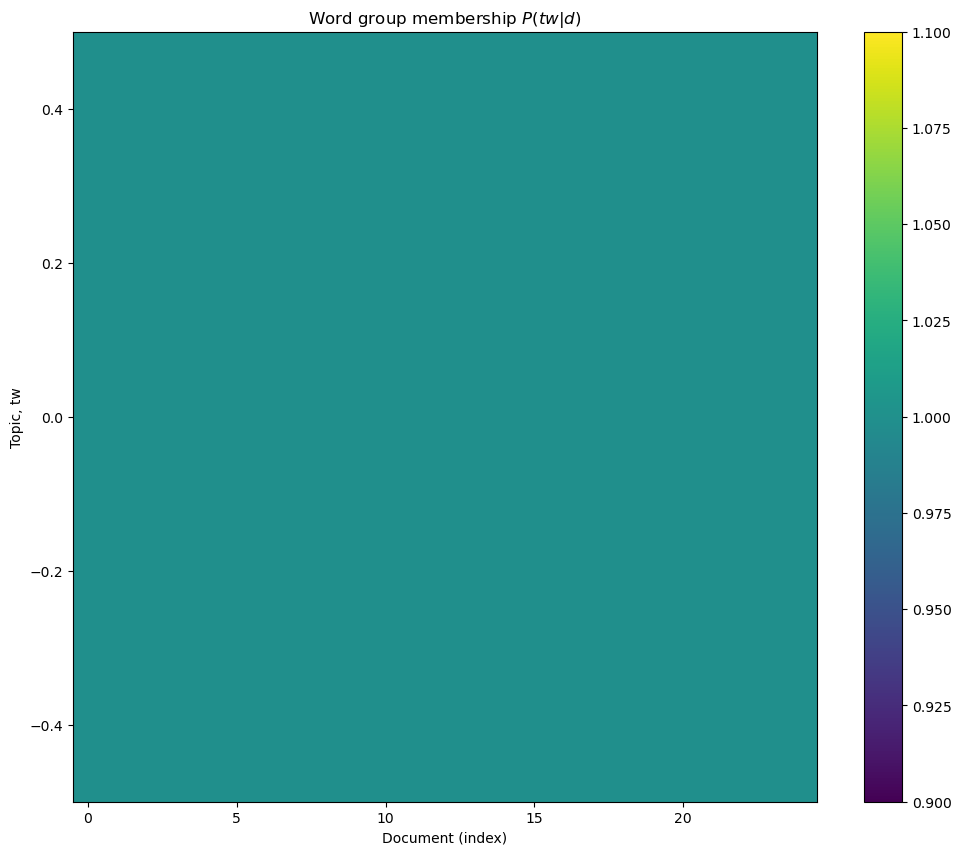

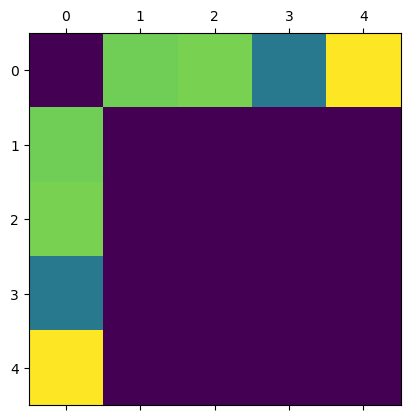

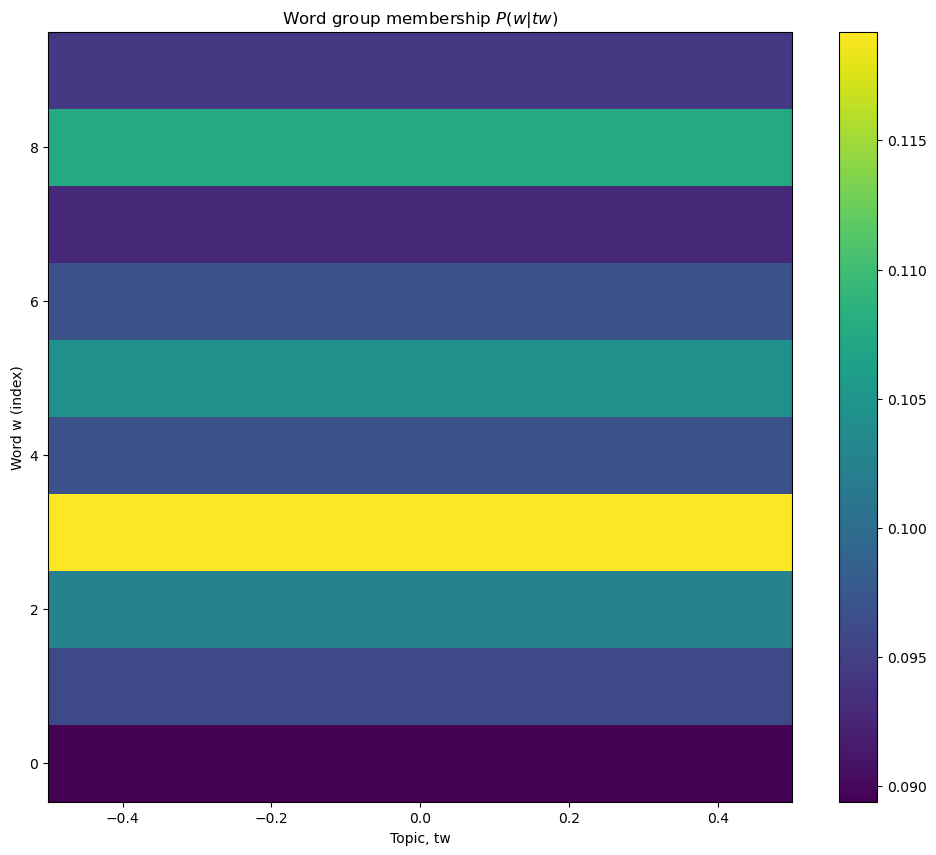

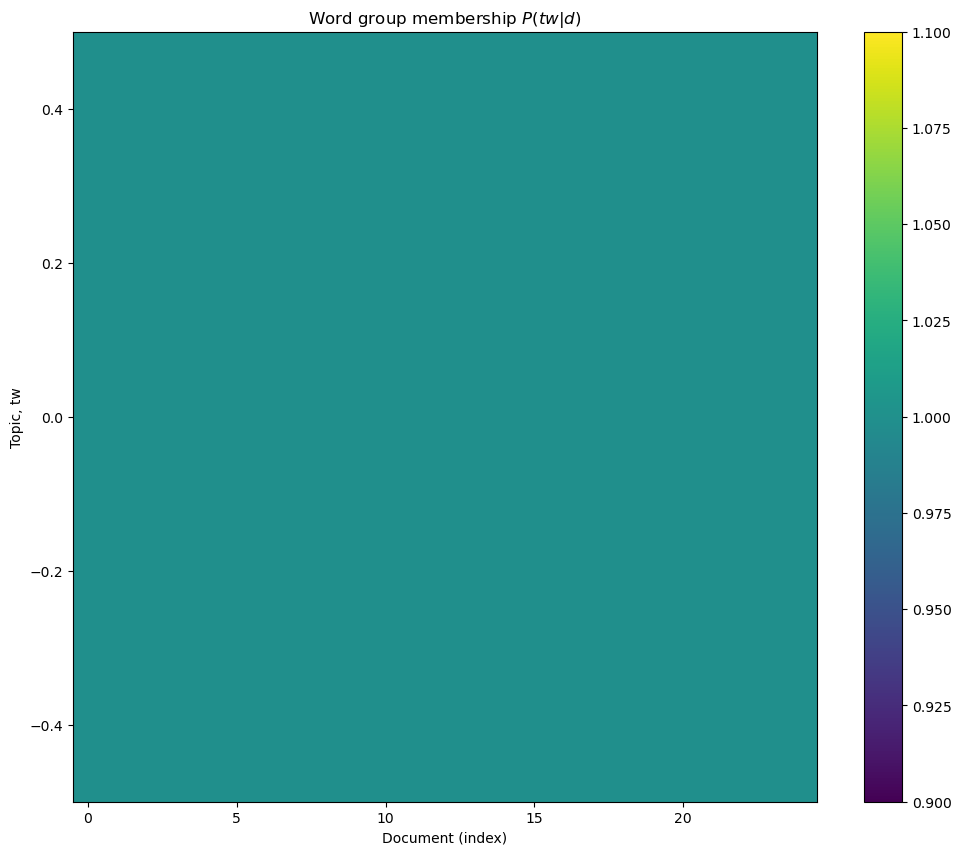

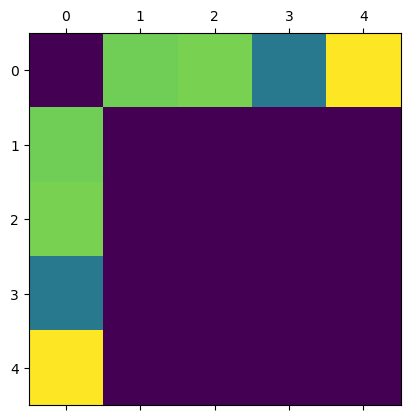

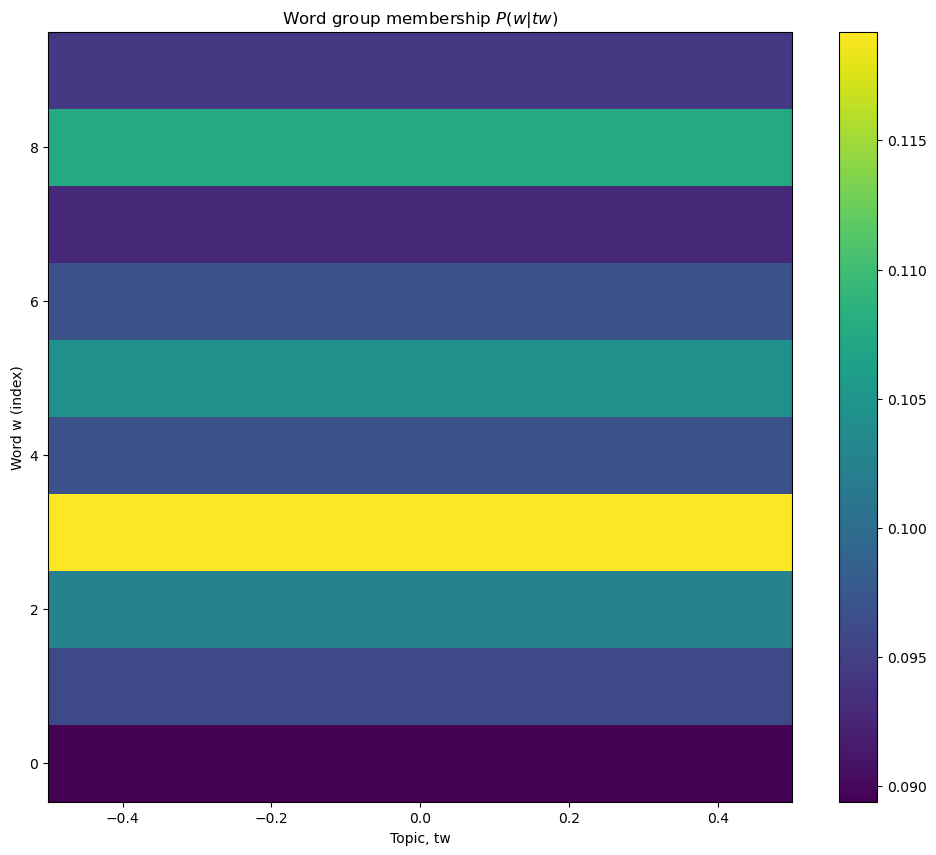

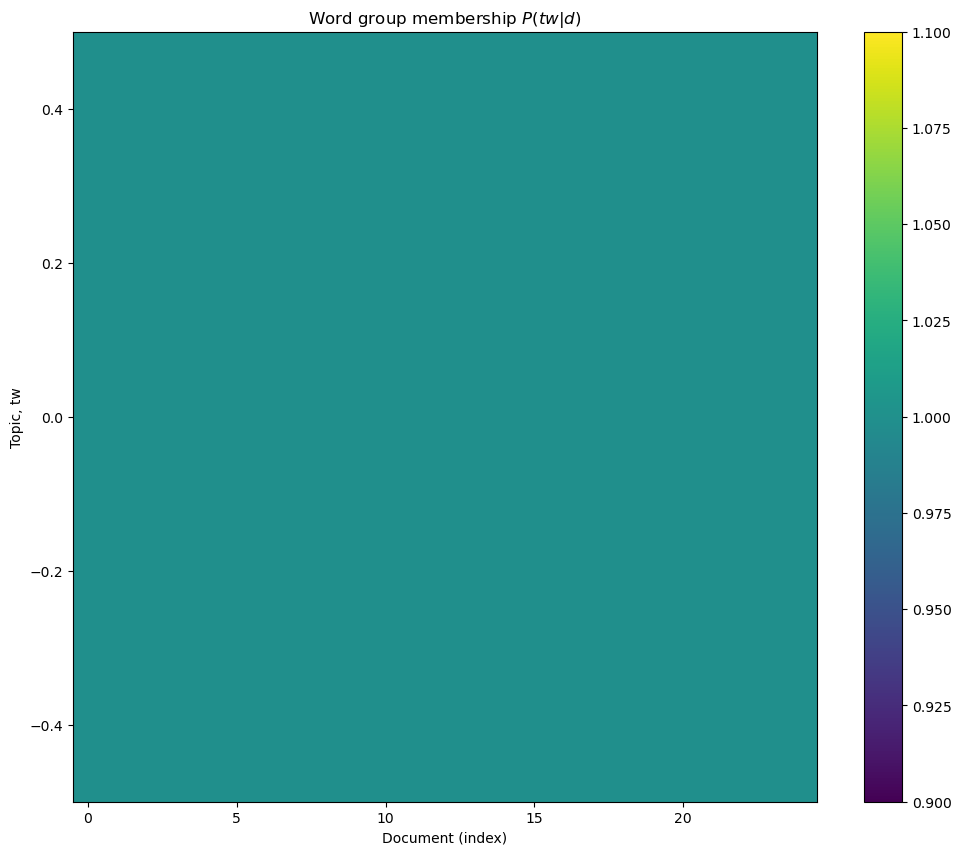

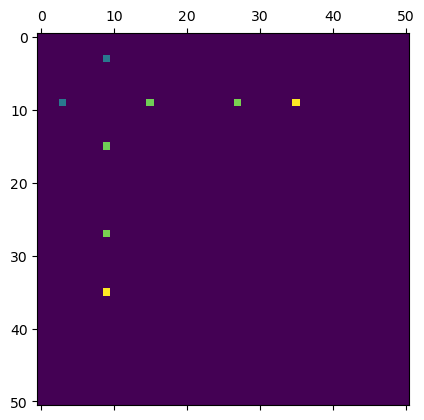

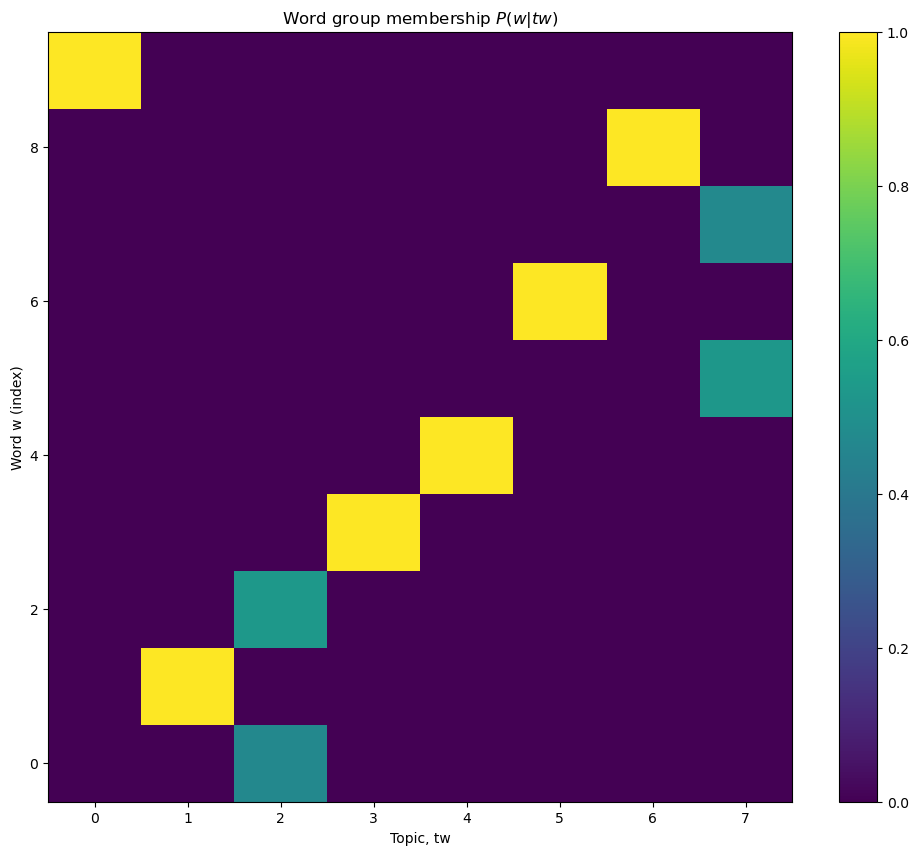

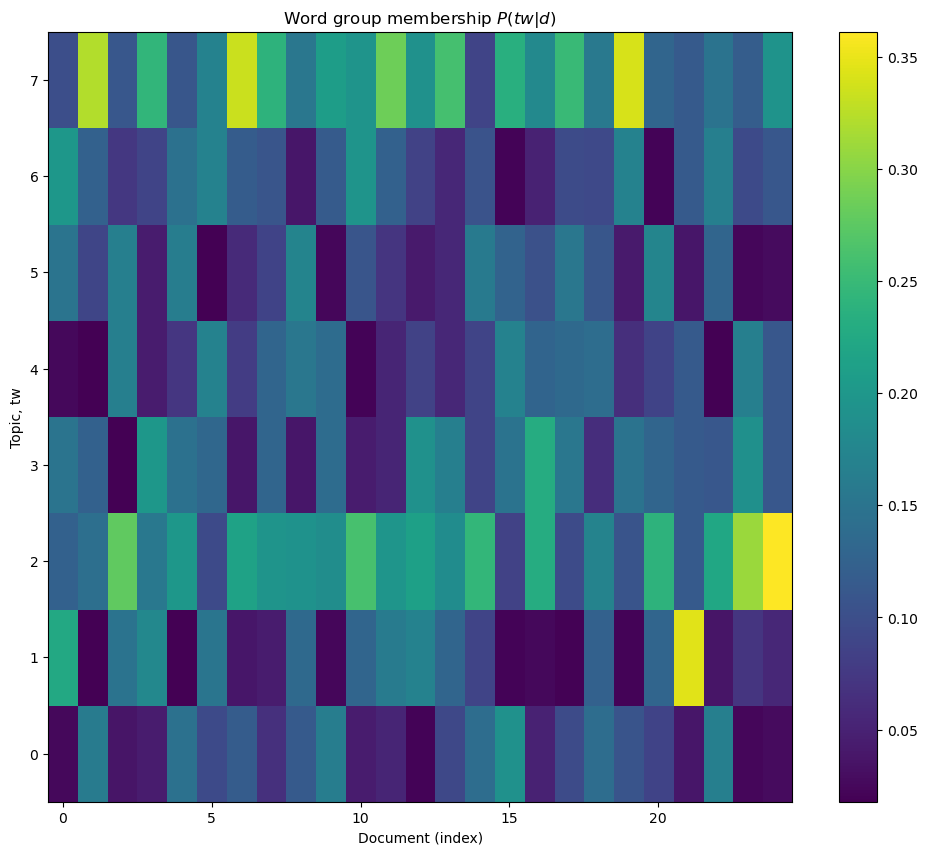

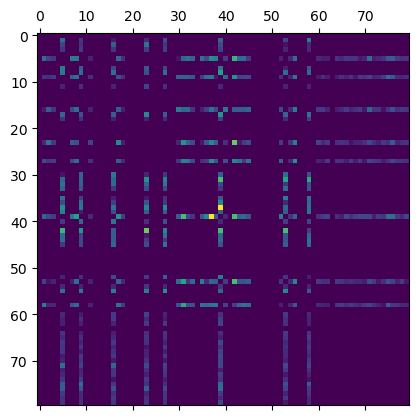

In [16]:
model.save_data()

In [17]:
model.print_summary()

In [18]:
model.metadata(l=0, n=-1, kind=2).keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [19]:
import graph_tool.all as gt

In [20]:
colmap = model.g.vertex_properties["color"] = model.g.new_vertex_property("vector<double>")
for v in model.g.vertices():
    k = model.g.vertex_properties['kind'][v]
    if k < 1:
        color = np.array([137,128,193])/255.
    elif k < 2:
        color = np.array([130,200,93])/255.
    elif k < 3:
        color = np.array([210,82,58])/255.
    elif k < 4:
        color = np.array([196,125,50])/255.
    else:
        color = np.array([187,129,164])/255.
    colmap[v] = color

In [21]:
gt.draw_hierarchy(model.state,
                layout="bipartite",
                subsample_edges=3500,
                vertex_color=colmap,
                vertex_fill_color=colmap,
                hedge_pen_width=5,
                hvertex_size=15,
                edge_pen_width=model.g.ep["count"],
                output="nsbm.png"
                 )

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4c02b779b0, at 0x7f4c0257a690>,
 <GraphView object, directed, with 162 vertices and 161 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f4c02926540, at 0x7f4c0251c710>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f4c02926540, at 0x7f4bcd4e7290>, False), at 0x7f4c02926540>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4c02926540, at 0x7f4c023f3a40>)